###  Load Data

In [1]:
import pandas as pd

In [5]:
papers = pd.read_csv('datasets/papers.csv')

In [6]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


###   Droping the columns from the data we don't want

In [8]:
papers.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [9]:
# we don't want id, event_type, pdf_name
#so we are going to drop these columns
papers.drop(['id','event_type','pdf_name'],axis=1,inplace=True)
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


###  Plot data and see the evolution of ML over time

In [14]:
groups = papers.groupby('year')

count = groups.size() #count of each year articles
count

year
1987     90
1988     94
1989    101
1990    143
1991    144
1992    127
1993    158
1994    140
1995    152
1996    152
1997    150
1998    151
1999    150
2000    152
2001    197
2002    207
2003    198
2004    207
2005    207
2006    204
2007    217
2008    250
2009    262
2010    292
2011    306
2012    368
2013    360
2014    411
2015    403
2016    569
2017    679
dtype: int64

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

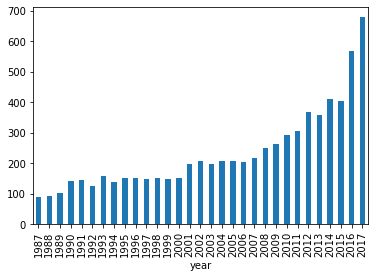

In [19]:
count.plot(kind='bar')

###  Pre-processing the Data

In [21]:
import re #import regular expression library

In [22]:
print(papers['title'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


##### we want to lowercase all the text of each column of 'title' and also want to remove the punctuations

In [26]:
# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]','',x))

#Convert to lowercase 
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

print(papers['title_processed'].head(10))

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
5    using a neural net to instantiate a deformable...
6             plasticity-mediated competitive learning
7    iceg morphology classification using an analog...
8    real-time control of a tokamak plasma using ne...
9    pulsestream synapses with non-volatile analogu...
Name: title_processed, dtype: object


###  Visualize Preprocessed text data using 'wordcloud' Library

In [52]:
import wordcloud

In [53]:
# join the different preprocessed title together
long_title = ' '.join(papers['title_processed'])
long_title


'self-organization of associative database and its applications a mean field theory of layer iv of visual cortex and its application to artificial neural networks storing covariance by the associative long-term potentiation and depression of synaptic strengths in the hippocampus bayesian query construction for neural network models neural network ensembles cross validation and active learning using a neural net to instantiate a deformable model plasticity-mediated competitive learning iceg morphology classification using an analogue vlsi neural network real-time control of a tokamak plasma using neural networks pulsestream synapses with non-volatile analogue amorphous-silicon memories learning to play the game of chess multidimensional scaling and data clustering an experimental comparison of recurrent neural networks training multilayer perceptrons with the extended kalman algorithm interference in learning internal models of inverse dynamics in humans active learning with statistical

In [54]:
wordcloud = wordcloud.WordCloud() # Create a wordcloud object

wordcloud.generate(long_title) #Generate wordcloud


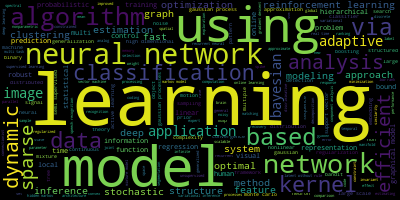

In [56]:
# Visualize wordcloud 
wordcloud.to_image()

###  Prepare for LDA Analysis ( latent Dirichlet allocation )

##### LDA don't work on text data so we need to first convert the data to vector representation


#####  we wil convert the tiltes to list of vector with length equal to the vocabulary

In [57]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [58]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

In [61]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

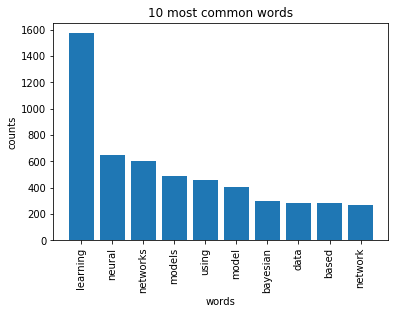

In [62]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

####  If you see the visualization done by wordCloud also highlights these 10 words

###  Analyzing Trends using LDA


In [64]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [65]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        

In [67]:
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
gaussian regression process vector support using model classification adaptive prediction

Topic #1:
learning approximation network sparse function decision algorithm value data optimal

Topic #2:
time data models matrix rank using probabilistic low model bayesian

Topic #3:
optimization stochastic inference variational processes learning information gradient bayesian propagation

Topic #4:
learning models analysis random generative model component data fields graphs

Topic #5:
neurons learning bounds using networks spiking models kernel distributions statistical

Topic #6:
learning multi reinforcement supervised models classification markov semi hidden recognition

Topic #7:
linear large scale learning non clustering spectral using analysis programming

Topic #8:
neural networks network recurrent model deep using recognition models control

Topic #9:
learning feature visual based using application image unsupervised selection reinforcement
